# 2. Manipulação de Dados 

In [3]:
import yfinance as yf
import pandas as pd
import datetime as dt

In [4]:
itub4 = yf.download('ITUB4.SA', start='2020-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


In [5]:
itub4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,37.279999,38.029999,36.990002,38.029999,31.228832,20666100
2020-01-03,37.500000,38.240002,37.450001,37.630001,30.900368,24891400
2020-01-06,37.549999,37.580002,36.910000,37.070000,30.440506,22294700
2020-01-07,37.070000,37.240002,36.209999,36.209999,29.734324,20000900
2020-01-08,36.450001,36.810001,35.619999,35.619999,29.249819,25980900
...,...,...,...,...,...,...
2020-12-22,31.170000,31.650000,31.150000,31.250000,26.311993,19659000
2020-12-23,31.320000,32.049999,31.270000,31.940001,26.892952,19959200
2020-12-28,32.220001,32.430000,32.009998,32.169998,27.086611,15444600


In [6]:
itub_total = itub4.copy()

In [7]:
itub_serires = itub4['Close']

In [8]:
itub4.index.day

Index([ 2,  3,  6,  7,  8,  9, 10, 13, 14, 15,
       ...
       15, 16, 17, 18, 21, 22, 23, 28, 29, 30],
      dtype='int32', name='Date', length=248)

In [9]:
itub4.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=248)

## 2.1 Datetime Lib

In [10]:
data = '04-05-2024'
data = dt.datetime.strptime(data, '%d-%m-%Y')
data

datetime.datetime(2024, 5, 4, 0, 0)

In [11]:
d = dt.datetime.now()
d

datetime.datetime(2024, 7, 19, 16, 51, 25, 253710)

In [12]:
t = dt.datetime.strftime(d, '%A')

In [13]:
dt.datetime.strftime(d, '%B')

'July'

In [14]:
dt.datetime.strftime(d, '%C')

'20'

### 2.12 TimeDelta

In [15]:
d_m_200 = dt.datetime.now() - dt.timedelta(days=200)

In [16]:
dt.datetime.strftime(d_m_200, '%Y-%m-%d')

'2024-01-01'

### 2.13 Usando o Pandas

In [17]:
data = pd.to_datetime(data, format='%d-%m-%Y')

In [18]:
data

Timestamp('2024-05-04 00:00:00')

In [19]:
pd.date_range(data, periods=5, freq='d')

DatetimeIndex(['2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07',
               '2024-05-08'],
              dtype='datetime64[ns]', freq='D')

### 2.14 Variáveis AUX

In [20]:
itub4 = itub4.head()

In [21]:
itub4.index = itub4.index.tz_localize('UTC').tz_convert('America/Sao_Paulo')

In [22]:
itub4['Time'] = itub4.index

C:\Users\mukkk\AppData\Local\Temp\ipykernel_9600\4153394085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4.index


In [23]:
itub4['Time'] = itub4['Time'].dt.time

C:\Users\mukkk\AppData\Local\Temp\ipykernel_9600\1433894871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4['Time'].dt.time


In [24]:
itub4['DayofYear'] = itub4['Time'].index.dayofyear

C:\Users\mukkk\AppData\Local\Temp\ipykernel_9600\4289030336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['DayofYear'] = itub4['Time'].index.dayofyear


In [25]:
itub4

,Open,High,Low,Close,Adj Close,Volume,Time,DayofYear
Date,,,,,,,,
2020-01-01 21:00:00-03:00,37.279999,38.029999,36.990002,38.029999,31.228832,20666100,21:00:00,1
2020-01-02 21:00:00-03:00,37.500000,38.240002,37.450001,37.630001,30.900368,24891400,21:00:00,2
2020-01-05 21:00:00-03:00,37.549999,37.580002,36.910000,37.070000,30.440506,22294700,21:00:00,5
2020-01-06 21:00:00-03:00,37.070000,37.240002,36.209999,36.209999,29.734324,20000900,21:00:00,6
2020-01-07 21:00:00-03:00,36.450001,36.810001,35.619999,35.619999,29.249819,25980900,21:00:00,7


##### Método resample

In [26]:
itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})
itub_total

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-31,37.279999,38.240002,32.540001,32.820000,26.950571
2020-02-29,33.000000,35.480000,30.570000,32.000000,26.668226
2020-03-31,31.930000,32.290001,20.000000,23.090000,19.251829
2020-04-30,22.219999,25.150000,20.010000,22.770000,18.997370
2020-05-31,21.950001,24.420000,20.730000,23.040001,19.235298
2020-06-30,22.830000,28.700001,22.700001,25.450001,21.261166
2020-07-31,25.600000,28.490000,25.540001,26.889999,22.477394
2020-08-31,27.100000,27.709999,23.510000,23.549999,19.739731
2020-09-30,23.870001,25.500000,22.299999,22.500000,18.871635


<Axes: xlabel='Date'>

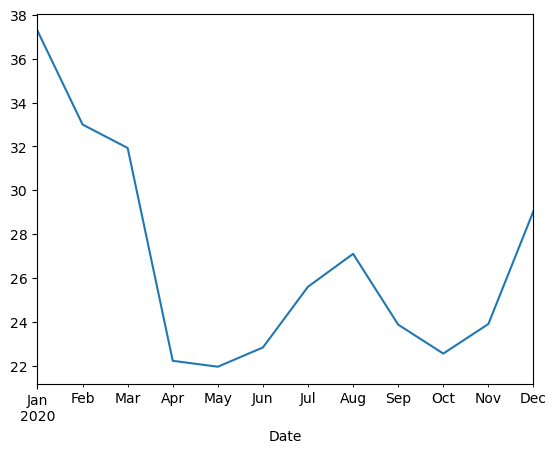

In [27]:
itub_total.Open.plot()

## 2.2 Multi Index

In [28]:
ibov = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]
ibov = [i + '.SA' for i in ibov]

In [29]:
df_ibov = yf.download(ibov, start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%%**********************]  91 of 91 completed

3 Failed downloads:
['VIIA3.SA', 'BRML3.SA', 'ENBR3.SA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [30]:
df_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           names=['Price', 'Ticker'], length=546)

In [55]:
set(df_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

<Axes: xlabel='Date'>

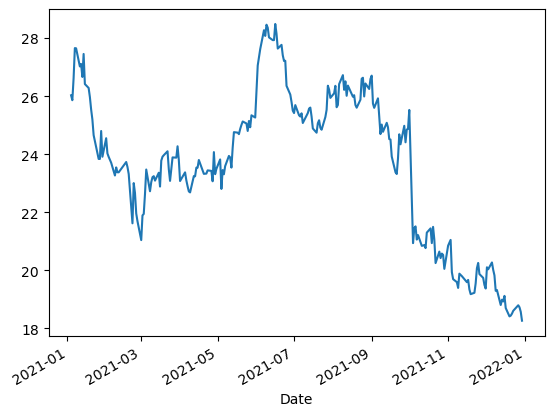

In [32]:
df_ibov[('Adj Close', 'ITUB4.SA')].plot()

## 2.3 Wide to Long - Redução do numero de colunas

In [56]:
df_ibov

Price       Adj Close                                                         \
Ticker       ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  13.386032  41.159180  73.296127  63.056488        NaN  37.730000   
2021-01-05  13.671393  41.178944  71.658234  62.092098        NaN  38.200001   
2021-01-06  13.948107  38.935696  66.978508  58.419983        NaN  36.669998   
2021-01-07  13.878928  38.243946  65.623344  58.345795        NaN  36.049999   
2021-01-08  14.294000  40.220375  70.195816  59.440014        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.037924  36.350895  29.959963  69.586952  13.893169  26.459999   
2021-12-27  14.019867  36.460327  31.100647  70.281235  13.449456  25.670000   
2021-12-28  14.010840  36.559811  30.252447  70.459480  12.916999  25.750000   
2021-12-29  13.947647  36.161884  30.242695  69.783974  12.660631  23.860001   
2021-12-30  13.920565  36.828415  30.788664  72.026299  12.778955  24.360001   

Price                                                   ...    Volume  \
Ticker       B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  17.423172  14.515561  15.783042  17.821547  ...   3897800   
2021-01-05  17.457462  14.364957  15.707579  17.712893  ...   8506600   
2021-01-06  17.171741  14.693189  16.102440  18.299940  ...   9998400   
2021-01-07  17.651749  15.276284  16.497305  18.785786  ...  11072300   
2021-01-08  17.911751  15.365102  16.370148  18.623842  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.291166  12.156210  12.526310  14.909593  ...   2893300   
2021-12-27  10.227864  12.181170  12.657355  15.080069  ...   7282600   
2021-12-28  10.092217  12.110446  12.649650  15.025825  ...   3367300   
2021-12-29  10.019870  12.048042  12.557146  14.956083  ...   2589100   
2021-12-30  10.074130  12.002282  12.480060  14.886337  ...   7149400   

Price                                                                          \
Ticker     TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5443040  11878657  20687900  37865500   3953500      NaN  2791400   
2021-01-05  4441586  11782070  18302900  34300300  12993100      NaN  2899200   
2021-01-06  5526344  14248832  23592900  53722500  10884000      NaN  5790100   
2021-01-07  3330663  12239176  22298600  74541400   6954300      NaN  5213500   
2021-01-08  8448005   9657378  23237000  58562700   8434100      NaN  2916600   
...             ...       ...       ...       ...       ...      ...      ...   
2021-12-23  2731000   2238400  10681800  13121200   3932100      NaN  1382200   
2021-12-27  3040900   5340800  10504500  11371400   4196700      NaN  1492300   
2021-12-28  3269600   3777100  13201600  18923700   3743000      NaN  1060000   
2021-12-29  3205000   3591300  10525500  12113500   3630700      NaN   930200   
2021-12-30  4400600   8871300  12815100  26568500  13547600      NaN  2392600   

Price                          
Ticker      WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

In [87]:
df_ibov_long = df_ibov.melt(ignore_index=False)

In [88]:
df_ibov_long

,Price,Ticker,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.338603e+01
2021-01-05,Adj Close,ABEV3.SA,1.367139e+01
2021-01-06,Adj Close,ABEV3.SA,1.394811e+01
2021-01-07,Adj Close,ABEV3.SA,1.387893e+01
2021-01-08,Adj Close,ABEV3.SA,1.429400e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


<Axes: xlabel='Date'>

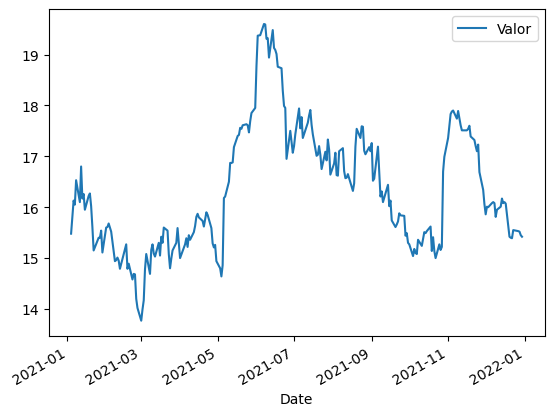

In [ ]:
df_ibov_longo_abev.plot()

In [90]:
df_ibov_long.columns = ['Parâmetro', 'Ativo', 'Valor']

In [97]:
df_ibov_long[(df_ibov_long['Parâmetro'] == 'Close') & (df_ibov_long['Ativo'] == 'ABEV3.SA')]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001
...,...,...,...
2021-12-23,Close,ABEV3.SA,15.550000
2021-12-27,Close,ABEV3.SA,15.530000
2021-12-28,Close,ABEV3.SA,15.520000


In [99]:
df_ibov_longo_b3 = df_ibov_long[df_ibov_long['Ativo'] == 'B3SA3.SA']

In [92]:
# Transformar o df em wide 

df_ibov_long.pivot(columns=['Parâmetro', 'Ativo'])

Valor                                                         \
Parâmetro   Adj Close                                                          
Ativo        ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  13.386032  41.159180  73.296127  63.056488        NaN  37.730000   
2021-01-05  13.671393  41.178944  71.658234  62.092098        NaN  38.200001   
2021-01-06  13.948107  38.935696  66.978508  58.419983        NaN  36.669998   
2021-01-07  13.878928  38.243946  65.623344  58.345795        NaN  36.049999   
2021-01-08  14.294000  40.220375  70.195816  59.440014        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.037924  36.350895  29.959963  69.586952  13.893169  26.459999   
2021-12-27  14.019867  36.460327  31.100647  70.281235  13.449456  25.670000   
2021-12-28  14.010840  36.559811  30.252447  70.459480  12.916999  25.750000   
2021-12-29  13.947647  36.161884  30.242695  69.783974  12.660631  23.860001   
2021-12-30  13.920565  36.828415  30.788664  72.026299  12.778955  24.360001   

                                                        ...              \
Parâmetro                                               ...      Volume   
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  17.423172  14.515561  15.783042  17.821547  ...   3897800.0   
2021-01-05  17.457462  14.364957  15.707579  17.712893  ...   8506600.0   
2021-01-06  17.171741  14.693189  16.102440  18.299940  ...   9998400.0   
2021-01-07  17.651749  15.276284  16.497305  18.785786  ...  11072300.0   
2021-01-08  17.911751  15.365102  16.370148  18.623842  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  10.291166  12.156210  12.526310  14.909593  ...   2893300.0   
2021-12-27  10.227864  12.181170  12.657355  15.080069  ...   7282600.0   
2021-12-28  10.092217  12.110446  12.649650  15.025825  ...   3367300.0   
2021-12-29  10.019870  12.048042  12.557146  14.956083  ...   2589100.0   
2021-12-30  10.074130  12.002282  12.480060  14.886337  ...   7149400.0   

                                                                       \
Parâmetro                                                               
Ativo        TOTS3.SA    UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                    
2021-01-04  5443040.0  11878657.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4441586.0  11782070.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5526344.0  14248832.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3330663.0  12239176.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8448005.0   9657378.0  23237000.0  58562700.0   8434100.0   
...               ...         ...         ...         ...         ...   
2021-12-23  2731000.0   2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0   5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0   3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0   3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0   8871300.0  12815100.0  26568500.0  13547600.0   

                                                       
Parâmetro                                              
Ativo      VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                   
2021-01-04      NaN  2791400.0   7219800.0  2640400.0  
2021-01-05      NaN  2899200.0  16633600.0  3703500.0  
2021-01-06      NaN  5790100.0  21507400.0  5004000.0  
2021-01-07      NaN  5213500.0  15129600.0  6138600.0  
2021-01-08      NaN  2916600.0  17381000.0  2685800.0  
...             ...        ...         ...        ...  
2021-12-23      NaN  1382200.0   

In [100]:
df_ibov_longo_b3.pivot(columns='Parâmetro', values= 'Valor')

Parâmetro,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,17.423172,20.326666,20.863333,20.206667,20.713333,25275300.0
2021-01-05,17.457462,20.366667,20.646666,19.886665,20.216665,29802900.0
2021-01-06,17.171741,20.033333,20.416666,19.676666,20.370001,51422400.0
2021-01-07,17.651749,20.593332,20.680000,19.913334,19.933332,27802200.0
2021-01-08,17.911751,20.896666,21.280001,20.496666,20.656666,41870100.0
...,...,...,...,...,...,...
2021-12-23,10.291166,11.380000,11.530000,11.300000,11.510000,38242300.0
2021-12-27,10.227864,11.310000,11.550000,11.190000,11.500000,26053300.0
2021-12-28,10.092217,11.160000,11.330000,11.100000,11.330000,15521100.0
